In [42]:
import os
from os.path import dirname
from pathlib import Path
import json

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# run_pythia_mmlu_custom.sh MODEL="EleutherAI/pythia-1b" GPU="4" TASK="mmlu_hs"

In [4]:
# get root directory
root = os.path.abspath('')
while root.split('/')[-1] != 'e2lm-cruise':
    root = dirname(root)

In [10]:
# get results
results_dir = 'examples/metadata_arch/'

results = []
for json_file in sorted(Path(root+'/'+results_dir).glob("**/*.json")):
    with json_file.open() as f:
        results.append(json.load(f))

In [44]:
# results for single task, single model, multiple checkpoints
model_name = results[0]['model_name_sanitized']
task = list(results[0]['group_subtasks'].keys())[0]

print(model_name, task)

EleutherAI__pythia-70m mmlu_hs


In [43]:
# collect data

steps = []
accuracies = []
error_bars = []


for checkpoint in results:
    
    # checkpoint
    step = checkpoint['configs'][task]['metadata']['revision']
    step = int(step.split('step')[-1])
    steps.append(step)
    
    # results
    values = checkpoint['results'][task]
    acc = values['acc,none']
    stderr = values['acc_stderr,none']
    accuracies.append(acc)
    error_bars.append(stderr)

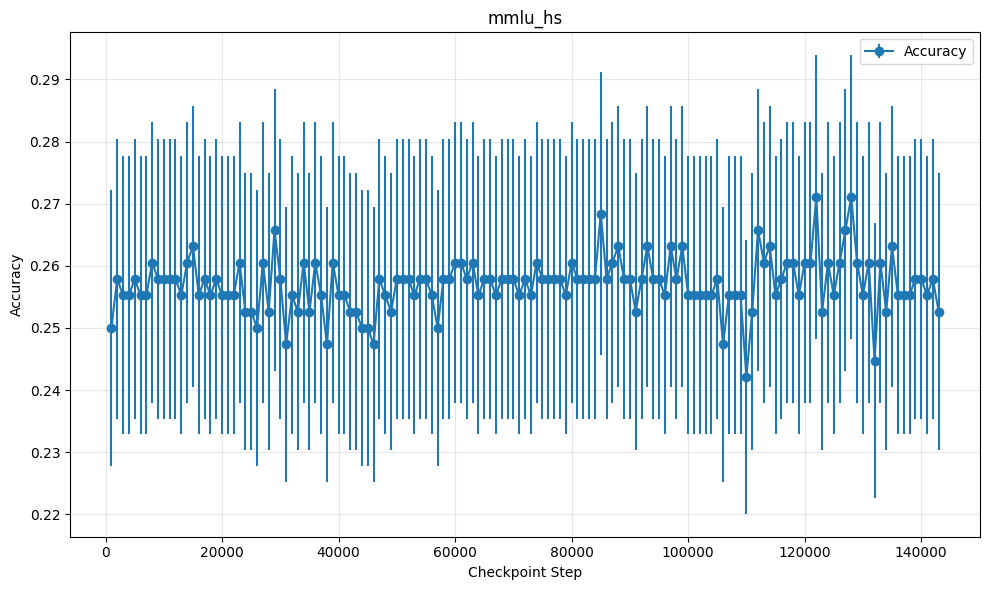

In [52]:
# EleutherAI__pythia-70m mmlu_hs

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(steps, accuracies, yerr=error_bars, fmt='o-', label='Accuracy')

# Add labels and title
ax.set_xlabel('Checkpoint Step')
ax.set_ylabel('Accuracy')
ax.set_title('mmlu_hs')
ax.legend()
ax.grid(True, alpha=0.3)

# If steps are not evenly spaced, you might want to adjust x-ticks
#if len(steps) > 0:
    #plt.xticks(steps)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# EleutherAI__pythia-70m mmlu_adv

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(steps, accuracies, yerr=error_bars, fmt='o-', label='Accuracy')

# Add labels and title
ax.set_xlabel('Checkpoint Step')
ax.set_ylabel('Accuracy')
ax.set_title('mmlu_hs')
ax.legend()
ax.grid(True, alpha=0.3)

# If steps are not evenly spaced, you might want to adjust x-ticks
#if len(steps) > 0:
    #plt.xticks(steps)

# Show the plot
plt.tight_layout()
plt.show()